## Optimization with constrains

In [9]:
%pylab inline
import GPyOpt
import GPy
from numpy.random import seed
seed(1234)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
# Define a feasible region
space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)},
        {'name': 'var_2', 'type': 'continuous', 'domain': (-1.5,1.5)}]

constrains = [
    {'name': 'constr_1', 'constrain': '-x[:,1] -.5 + abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'},
    {'name': 'constr_2', 'constrain': 'x[:,1] +.5 - abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'}]

feasible_region =  GPyOpt.Design_space(space = space, constrains = constrains)

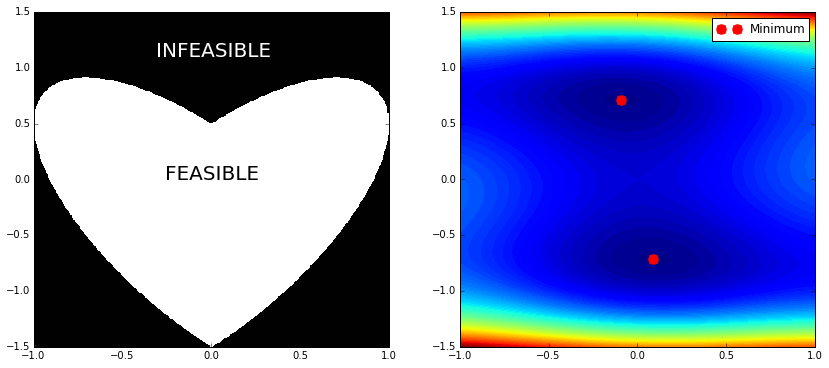

In [99]:
# plot of the feasible region
grid = 400
bounds = feasible_region.get_continuous_bounds()
X1 = np.linspace(bounds[0][0], bounds[0][1], grid)
X2 = np.linspace(bounds[1][0], bounds[1][1], grid)
x1, x2 = np.meshgrid(X1, X2)
X = np.hstack((x1.reshape(grid*grid,1),x2.reshape(grid*grid,1)))

masked_ind = feasible_region.indicator_constrains(X).reshape(grid,grid)
masked_ind = np.ma.masked_where(masked_ind > 0.5, masked_ind)
masked_ind[1,1]=1

plt.figure(figsize=(14,6))
plt.subplot(121)
plt.contourf(X1, X2, masked_ind ,100, cmap= plt.cm.bone, alpha=1,origin ='lower')
plt.text(-0.25,0,'FEASIBLE',size=20)
plt.text(-0.3,1.1,'INFEASIBLE',size=20,color='white')
plt.subplot(122)
plt.plot()
plt.contourf(X1, X2, func.f(X).reshape(grid,grid),100, alpha=1,origin ='lower')
plt.plot(np.array(func.min)[:,0], np.array(func.min)[:,1], 'r.', markersize=20, label=u'Minimum')
plt.legend()

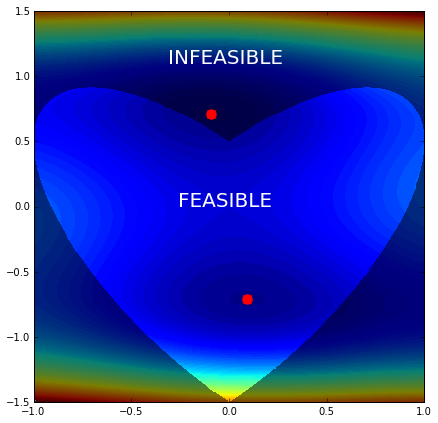

In [104]:
# --- Objective
# --- Load a problem from GPyOpt
func      = GPyOpt.objective_examples.experiments2d.sixhumpcamel(bounds)
objective = GPyOpt.core.task.SingleObjective(func.f, space)

plt.figure(figsize=(7,7))
OB = plt.contourf(X1, X2, func.f(X).reshape(grid,grid),100,alpha=1)
IN = plt.contourf(X1, X2, masked_ind ,100, cmap= plt.cm.bone, alpha=.5,origin ='lower')
plt.text(-0.25,0,'FEASIBLE',size=20,color='white')
plt.text(-0.3,1.1,'INFEASIBLE',size=20,color='white')
plt.plot(np.array(func.min)[:,0], np.array(func.min)[:,1], 'r.', markersize=20, label=u'Minimum')

In [129]:
# --- CHOOSE the model type
model = GPyOpt.models.GPModel(exact_feval=True,optimize_restarts=5,verbose=False)

In [130]:
# --- CHOOSE the acquisition optimizer
aquisition_optimizer = GPyOpt.optimization.ContAcqOptimizer(feasible_region, 500)

In [140]:
# --- CHOOSE the type of acquisition
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, feasible_region, optimizer=aquisition_optimizer)

In [145]:
# --- CHOOSE the intial design
initial_design = GPyOpt.util.stats.initial_design('random', feasible_region.get_continuous_bounds(), 4)

In [146]:
# BO object
bo = GPyOpt.core.BO(model, space, objective, acquisition, initial_design)

In [147]:
# --- Stop conditions
max_time  = None 
max_iter  = 5
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbose=False) 

Optimization restart 1/5, f = 5.68563801215
Optimization restart 2/5, f = 5.67575795737
Optimization restart 3/5, f = 5.68563795463
Optimization restart 4/5, f = 5.68563801107
Optimization restart 5/5, f = 5.67575432377
Optimization restart 1/5, f = 7.09470437645
Optimization restart 2/5, f = 7.0947043067
Optimization restart 3/5, f = 7.09470430538
Optimization restart 4/5, f = 7.09470433429
Optimization restart 5/5, f = 7.09470428898
Optimization restart 1/5, f = 8.51363122766
Optimization restart 2/5, f = 8.51363278091
Optimization restart 3/5, f = 8.51363173061
Optimization restart 4/5, f = 8.51363127084
Optimization restart 5/5, f = 8.51363250581
Optimization restart 1/5, f = 9.93256974931
Optimization restart 2/5, f = 9.93256996242
Optimization restart 3/5, f = 9.93257029266
Optimization restart 4/5, f = 9.93256997285
Optimization restart 5/5, f = 9.93256983095
Optimization restart 1/5, f = 10.8756201678
Optimization restart 2/5, f = 10.8756203303
Optimization restart 3/5, f = 10.

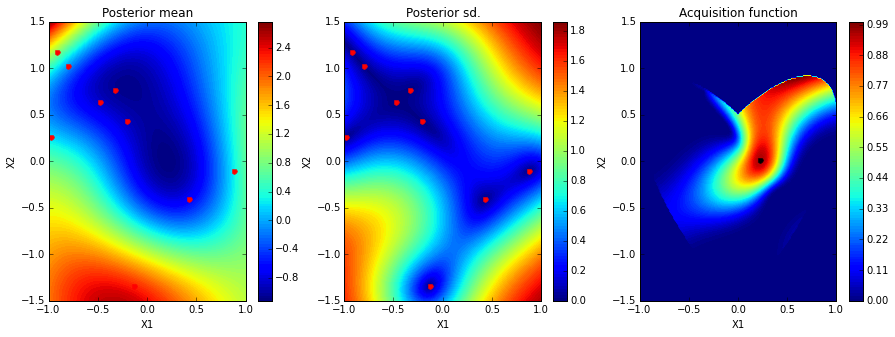

In [148]:
bo.plot_acquisition()